# Reinforcement Learning: DQN Implementations

What's covered: 

* Explain fundamentals Deep-Q-Learning
* Practical examples of Deep-Q-Learning
    * CartPole example

## Table of Contents
- [1 - Fundamentals](#1)
    - [1.1 - Limitations of Q-Learning with Q-Tables](#1.1)
    - [1.2 - Deep-Q-Learning](#1.2)
    - [1.3 - Deep-Q-Network](#1.3)
    - [1.4 - Experience Replay](#1.4)
    - [1.5 - Target Network](#1.5)
    - [1.2 - Deep-Q-Learning](#1.2)
- [2 - Lunar Lander Example](#2)
    - [2.1 - Packages](#2.1)
    - [2.2 - Create environment with OpenAI Gym](#2.2)
    - [2.3 - Take random actions in environment](#2.3)
    - [2.4 - DQN Implementation from scratch with Tensorflow](#2.4)
    - [2.5 - DQN implementation with Keras-RL](#2.5)

<a name='1'></a>
# 1 - Fundamentals

<a name='1.1'></a>
## 1.1 - Limitations of Q-Learning with Q-Tables

The Q-learning algorithm do a pretty decent job in relatively small state spaces, but it's performance will drop-off considerably when we work in more complex and sophisticated environments. 

Think about a video game where a player has a large environment to roam around in. Each state in the environment would be represented by a set of pixels, and the agent may be able to take serveral actions from each state. The iterative process of computing and updating Q-values for each state-action pair in a large state space becomes computationally inefficient and perhaps infeasible due to the computational resources and time this may take.

So what can we do when we want to manage more sophisticated environments with large state spaces? Well, rather than using value iteration to directly compute Q-values and find the optimal Q-function, we instead use a function approximation to estimate the optimal Q-function.

<a name='1.2'></a>
## 1.2 - Deep-Q-Learning

We'll make use of a deep neural network to estimate the Q-values for each state-action pair in a given environment, and in turn, the network will approximate the optimal Q-function. The act of combining Q-learning with a deep neural network is called *Deep-Q-Learning*, and a deep neural network that approximates a Q-function is called *Deep-Q-Network* or *DQN*.

<a name='1.3'></a>
## 1.3 - Deep-Q-Network

Suppose we have some arbitrary deep neural network that accepts states from a given environment as input. For each given state input, the network outputs estimated Q-values for each action that can be taken from that state. The objective of this network is to approximate the optimal Q-function, and remember that the optimal Q-function will satisfy the Bellman equation.

<img src="images/deep_q_network.png" style="width:400;height:400px;">
<caption><center><font ><b>Figure 1</b>: Deep-Q-Network </center></caption>

Which this in mind, the loss from the network ic calculated by comparing the outputted Q-values to the target Q-values from the right hand side of the Bellman equation, and as with any network, the objective here is to minmize this loss.
    
After the loss is calculated, the weights within the network are updated via SGD and backpropagation, again, just like with any other typical network. This process is done over and over again for each state in the environment until we sufficiently minimize the loss and get an approximate optimal Q-function.
    
**The Input**
    
The network accept states from the environment as input. In more complex environments, like a video games, images can be used as input. Usually there will be some preprocessing on these types of inputs. 

Sometimes a single frame is not enough to represent a single input state, so we have to stack a few consecutive frames to represent a single input. 
    
**The Layers**

The layers in a *Deep-Q-Network* are not different than layers in other known networks. Many *Deep-Q-Networks* are purely just some convolutional layers, followed by some non-linear activation function, and a couple of fully connected layers at the end. 
    
**The Output**
    
The output layer is a fully connected layer and it produces the Q-value for each action that can be taken from the given state that was passed as input. There is no activation function after the output layer since we want the raw, non-transformed Q-values from the network. 

<a name='1.4'></a>
## 1.4 - Experience Replay

With deep-q-networks, a technique called experience replay is often used during training. With this technique the agent's experience is stored at each time step in a data set called the *replay memory*. 

At time *t*, the agent's experience $e_{t}$ is defined as this tuple:

$$e_{t}=(s_{t}, a_{t}, r_{t+1}, s_{t+1})$$

All of the agent's experience at each time step over all episodes played by the agent are stored in the *replay memory*. In practice usually a finite size limit is set and only the last *N* experiences are stored. 

Why is the network trained by random samples from replay memory, rather than just providing the network with the sequential experiences as they occur in the environment? If the network learned only from consecutive samples of experience as they occured sequentially in the environment, the samples would be highly correlated and would therefore lead to inefficient and unstable learning. Taking random samples from replay memory breaks this correlation. 

**Training a Deep-Q-Network with Replay Memory**

After storing an experiences in replay memory, a random batch of experiences is sampled from replay memory. The state is then passed to the network as input. The input state data then forward propagates through the network, using the same forward propagation technique like other general neural networks. The model then outputs an estimated Q-value for each possible action from the given input state. 

The loss is then calculated. This is done by comparing the Q-value output from the network for the action in the experience tuple and the corresponding optimal Q-value, or *target Q-value*, for the same action. Remember, the target Q-value is calculated using the expression from the right rand side of the Bellman equation. So, the loss is calculated by subtracting the Q-value for a given state-action pair from the optimal Q-value from the same state-action pair. 

To compute the optimal Q-value for any given state-action pair, the state *s'* is passed to the policy network, which will output the Q-values for each state-action pair using *s'* as the state and each of the possible next actions as *a'*. 

<a name='1.5'></a>
## 1.5 - Target Network

The target network is a second network that is used to calculate the target Q-values. Rather than calculate them from the policy network, they are obtained by a completely separate network, appropriately called the *target network*. 

The target network is a clone of the policy network. Its weights are frozen with the original policy network's weights, and are updated every certain amount of time steps. This certain amount of time steps can be looked at as yet another hyperparameter. As it turns out, the use of a target network removes much of the instability introduced by using only one network to calculate both the Q-values, as well as the target Q-values. 

<a name='2'></a>
# 2 - Lunar Lander Example

<a name='2.1'></a>
## 2.1 - The Set Up

This environment is a classic rocket trajectory optimization problem. According to Pontryagin’s maximum principle, it is optimal to fire the engine at full throttle or turn it off. This is the reason why this environment has discrete actions: engine on or off.

There are two environment versions: discrete or continuous. The landing pad is always at coordinates (0,0). The coordinates are the first two numbers in the state vector. Landing outside of the landing pad is possible. Fuel is infinite, so an agent can learn to fly and then land on its first attempt.

<img src="images/lunar_lander.png">
<caption><center><font ><b>Figure 1</b>: Lunar Landar </center></caption>
    
**Action Space**

There are four discrete actions available: do nothing, fire left orientation engine, fire main engine, fire right orientation engine.
    
**Observation Space**
    
There are 8 states: the coordinates of the lander in x & y, its linear velocities in x & y, its angle, its angular velocity, and two booleans that represent whether each leg is in contact with the ground or not.
    
**Rewards**
    
Reward for moving from the top of the screen to the landing pad and coming to rest is about 100-140 points. If the lander moves away from the landing pad, it loses reward. If the lander crashes, it receives an additional -100 points. If it comes to rest, it receives an additional +100 points. Each leg with ground contact is +10 points. Firing the main engine is -0.3 points each frame. Firing the side engine is -0.03 points each frame. Solved is 200 points.
    
**Starting State**
    
The lander starts at the top center of the viewport with a random initial force applied to its center of mass.
    
**Episode Termination**
    
The episode terminates if any one of the following occurs:
* the lander crashes (the lander body gets in contact with the moon);
* the lander gets outside of the viewport (x coordinate is greater than 1);
* the lander is not awake. From the Box2D docs, a body which is not awake is a body which doesn’t move and doesn’t collide with any other body: When Box2D determines that a body (or group of bodies) has come to rest, the body enters a sleep state which has very little CPU overhead. If a body is awake and collides with a sleeping body, then the sleeping body wakes up. Bodies will also wake up if a joint or contact attached to them is destroyed.    

<a name='2.2'></a>
## 2.2 - Packages

Let's first install and import all packages we need:
- [numpy](https://www.numpy.org) - fundamental package for scientific computing with Python.
- [tensorflow](https://www.tensorflow.org) - fundamental package for machine learning and artificial intelligence with Python.
- [OpenAI gym](https://gym.openai.com) - toolkit for developing and comparing reinforcement learning algorithms. The gym library provides an easy-to-use suite of reinforcement learning tasks
- [keras](https://keras.io/) - library for artificial neural networks and acts as an interface for the TensorFlow library.
- [keras-rl2](https://keras-rl.readthedocs.io/en/latest/) - library for reinforcement learning agents.

Lunar Landar documentation: [Lunar Lander Documentation](https://www.gymlibrary.ml/environments/box2d/lunar_lander/)

Available environments: [OpenAI Gym environments](https://www.gymlibrary.ml/)

In [ ]:
""" Install packages """
!pip install gym
!pip install pygame
!pip install tensorflow
!pip install keras

<a name='2.3'></a>
## 2.3 - Take random actions in enviroment

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plotLearning(x, scores, epsilons, filename, lines=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, label="1")
    ax2 = fig.add_subplot(111, label="2", frame_on=False)
    
    ax.plot(x, epsilons, color="C0")
    ax.set_xlabel("Game", color="C0")
    ax.set_ylabel("Epsilon", color="C0")
    ax.tick_params(axis="x", colors="C0")
    ax.tick_params(axis="y", colors="C0")
    
    N = len(scores)
    running_avg = np.empty(N)
    for t in range(N):
        running_avg[t] = np.mean(scores[max(0, t-20):(t+1)])
        
    ax2.scatter(x, running_avg, color="C1")
    ax2.axes.get_xaxis().set_visible(False)
    ax2.yaxis.tick_right()
    ax2.set_ylabel("Score", color="C1")
    ax2.yaxis.set_label_position("right")
    ax2.tick_params(axis="y", colors="C1")
    
    if lines is not None:
        for line in lines:
            plt.axvline(x=line)
    
    plt.savefig(filename)

2022-07-26 15:03:02.869532: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-07-26 15:03:02.872644: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/dfki.uni-bremen.de/pmelzer/catkin_ws/devel/lib:/opt/ros/noetic/lib
2022-07-26 15:03:02.872652: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/home/dfki.uni-bremen.de/pmelzer/anaconda3/envs/reinforcement_learning/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:97: UserWarning: WARN: We recommend you to use a symmetric and normalized Box action space (ran

episode:  1 score -118.22 average_score -118.22
episode:  2 score -156.81 average_score -137.51
episode:  3 score -231.49 average_score -168.84
episode:  4 score -90.14 average_score -149.16
episode:  5 score -315.84 average_score -182.50
episode:  6 score -148.24 average_score -176.79
episode:  7 score -524.41 average_score -226.45
episode:  8 score -99.96 average_score -210.64
episode:  9 score -92.31 average_score -197.49
episode:  10 score -306.18 average_score -208.36
episode:  11 score -332.30 average_score -219.63
episode:  12 score -173.92 average_score -215.82
episode:  13 score -386.21 average_score -228.92
episode:  14 score -119.61 average_score -221.12
episode:  15 score -178.19 average_score -218.26
episode:  16 score -121.40 average_score -212.20
episode:  17 score -156.52 average_score -208.93
episode:  18 score -259.15 average_score -211.72
episode:  19 score -521.82 average_score -228.04
episode:  20 score -85.91 average_score -220.93
episode:  21 score -97.70 average

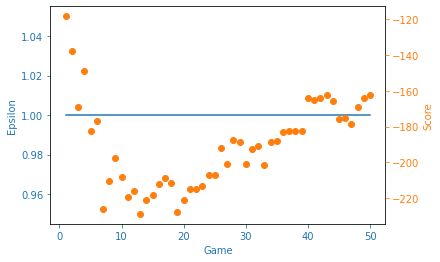

In [2]:
import tensorflow as tf
import gym
import numpy as np

tf.compat.v1.disable_eager_execution()
env = gym.make('LunarLander-v2')  # load gym environment

episodes = 50  # define number of episodes
scores = []
eps_history = []

for i in range(1, episodes+1):
    observation = env.reset()
    done = False
    score = 0    
    while not done:  # take steps in an episode until done 
        # env.render()
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        score += reward
    scores.append(score)
    eps_history.append(1.0)

    avg_score = np.mean(scores[-100:])
    print('episode: ', i, 'score %.2f' % score,
                'average_score %.2f' % avg_score)
    
filename = 'learning_curve_lunar_lander_random_actions.png'
x = [i+1 for i in range(episodes)]
plotLearning(x, scores, eps_history, filename)

<a name='2.4'></a>
## 2.4 - DQN Implementation from scratch with Tensorflow

In [3]:
"""Create ReplayMemory Class"""

import numpy as np


class ReplayMemory():
    def __init__(self, max_size, input_dims):
        self.mem_size = max_size
        self.mem_cntr = 0

        self.state_memory = np.zeros((self.mem_size, *input_dims), 
                                    dtype=np.float32)
        self.new_state_memory = np.zeros((self.mem_size, *input_dims),
                                dtype=np.float32)
        self.action_memory = np.zeros(self.mem_size, dtype=np.int32)
        self.reward_memory = np.zeros(self.mem_size, dtype=np.float32)
        self.terminal_memory = np.zeros(self.mem_size, dtype=np.int32)

    def store_transition(self, state, action, reward, state_, done):
        index = self.mem_cntr % self.mem_size
        self.state_memory[index] = state
        self.new_state_memory[index] = state_
        self.reward_memory[index] = reward
        self.action_memory[index] = action
        self.terminal_memory[index] = 1 - int(done)
        self.mem_cntr += 1

    def sample_buffer(self, batch_size):
        max_mem = min(self.mem_cntr, self.mem_size)
        batch = np.random.choice(max_mem, batch_size, replace=False)

        states = self.state_memory[batch]
        states_ = self.new_state_memory[batch]
        rewards = self.reward_memory[batch]
        actions = self.action_memory[batch]
        terminal = self.terminal_memory[batch]

        return states, actions, rewards, states_, terminal

In [4]:
""" Create DeepQNetwork Class """

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense
import keras

class DeepQNetwork(keras.Model):
    def __init__(self, input_dims, n_actions, fc1_dims, fc2_dims):
        super(DeepQNetwork, self).__init__()
        self.fc1 = Dense(fc1_dims, activation='relu')
        self.fc2 = Dense(fc2_dims, activation='relu')
        self.fc3 = Dense(n_actions, activation=None)    
        
    def call(self, state):
        x = self.fc1(state)
        x = self.fc2(x)
        x = self.fc3(x)
        
        return x

In [5]:
""" Create DQNAgent Class """

class DQNAgent():
    def __init__(self, lr, gamma, n_actions, epsilon, batch_size,
                input_dims, epsilon_dec=1e-3, epsilon_min=0.01,
                replace_target=1000, mem_size=1000000, fname='dqn_model.h5'):
        self.action_space = [i for i in range(n_actions)]
        self.gamma = gamma
        self.epsilon = epsilon
        self.eps_dec = epsilon_dec
        self.eps_min = epsilon_min
        self.batch_size = batch_size
        self.replace_target = replace_target
        self.model_file = fname
        self.memory = ReplayMemory(mem_size, input_dims)   
        self.policy_network = DeepQNetwork(input_dims, n_actions, fc1_dims=256, fc2_dims=256)
        self.policy_network.compile(optimizer=Adam(learning_rate=lr), loss='mean_squared_error')
        self.target_network = DeepQNetwork(input_dims, n_actions, fc1_dims=256, fc2_dims=256)
        self.target_network.compile(optimizer=Adam(learning_rate=lr), loss='mean_squared_error')
        
    def store_transition(self, state, action, reward, new_state, done):
        self.memory.store_transition(state, action, reward, new_state, done)

    def choose_action(self, observation):
        if np.random.random() < self.epsilon:
            action = np.random.choice(self.action_space)
        else:
            state = np.array([observation])
            actions = self.policy_network.predict(state)
            action = np.argmax(actions)
        return action

    def replace_target_network(self):
        self.target_network.set_weights(self.policy_network.get_weights())

    def learn(self):
        if self.memory.mem_cntr < self.batch_size:
            return

        states, actions, rewards, states_, dones = self.memory.sample_buffer(self.batch_size)

        q_policy_network = self.policy_network.predict(states)
        q_target_network = self.policy_network.predict(states_)

        q_target = np.copy(q_policy_network)
        batch_index = np.arange(self.batch_size, dtype=np.int32)

        q_target[batch_index, actions] = rewards + self.gamma * np.max(q_target_network, axis=1)*dones

        self.policy_network.train_on_batch(states, q_target)

        self.epsilon = self.epsilon - self.eps_dec if self.epsilon > self.eps_min else self.eps_min
                
        #if self.memory.mem_cntr % self.replace_target == 0:
        #    self.replace_target_network()

    def save_model(self):
        self.policy_network.save(self.model_file)

    def load_model(self):
        self.policy_network = load_model(self.model_file)

episode:  0 score -295.87 average_score -295.87 epsilon 0.93
episode:  1 score -111.39 average_score -203.63 epsilon 0.87
episode:  2 score -20.62 average_score -142.63 epsilon 0.78
episode:  3 score -225.68 average_score -163.39 epsilon 0.69
episode:  4 score -100.02 average_score -150.72 epsilon 0.56
episode:  5 score -106.21 average_score -143.30 epsilon 0.31
episode:  6 score -552.53 average_score -201.76 epsilon 0.20
episode:  7 score -166.12 average_score -197.31 epsilon 0.01
episode:  8 score -435.36 average_score -223.76 epsilon 0.01
episode:  9 score -79.49 average_score -209.33 epsilon 0.01
episode:  10 score -170.12 average_score -205.76 epsilon 0.01
episode:  11 score -94.92 average_score -196.53 epsilon 0.01
episode:  12 score -522.36 average_score -221.59 epsilon 0.01
episode:  13 score -171.16 average_score -217.99 epsilon 0.01
episode:  14 score -91.05 average_score -209.53 epsilon 0.01
episode:  15 score -220.72 average_score -210.23 epsilon 0.01
episode:  16 score -23

episode:  135 score 177.17 average_score 39.63 epsilon 0.01
episode:  136 score 168.38 average_score 42.40 epsilon 0.01
episode:  137 score 163.64 average_score 44.72 epsilon 0.01
episode:  138 score 221.93 average_score 47.71 epsilon 0.01
episode:  139 score 249.43 average_score 50.10 epsilon 0.01
episode:  140 score -148.38 average_score 49.81 epsilon 0.01
episode:  141 score 196.61 average_score 53.06 epsilon 0.01
episode:  142 score 208.76 average_score 59.88 epsilon 0.01
episode:  143 score 236.13 average_score 64.73 epsilon 0.01
episode:  144 score 203.30 average_score 67.64 epsilon 0.01
episode:  145 score 184.83 average_score 69.65 epsilon 0.01
episode:  146 score 142.91 average_score 71.54 epsilon 0.01
episode:  147 score 253.19 average_score 75.11 epsilon 0.01
episode:  148 score 234.42 average_score 77.50 epsilon 0.01
episode:  149 score 213.38 average_score 80.20 epsilon 0.01
episode:  150 score 179.48 average_score 82.37 epsilon 0.01
episode:  151 score 241.11 average_scor

episode:  270 score 208.74 average_score 156.25 epsilon 0.01
episode:  271 score 261.56 average_score 156.60 epsilon 0.01
episode:  272 score 190.32 average_score 158.92 epsilon 0.01
episode:  273 score 244.64 average_score 159.39 epsilon 0.01
episode:  274 score 264.74 average_score 159.66 epsilon 0.01
episode:  275 score 215.92 average_score 162.07 epsilon 0.01
episode:  276 score -26.32 average_score 159.64 epsilon 0.01
episode:  277 score 128.54 average_score 158.59 epsilon 0.01
episode:  278 score 195.94 average_score 158.26 epsilon 0.01
episode:  279 score -57.65 average_score 155.82 epsilon 0.01
episode:  280 score 252.15 average_score 158.28 epsilon 0.01
episode:  281 score 235.20 average_score 158.33 epsilon 0.01
episode:  282 score 234.02 average_score 158.17 epsilon 0.01
episode:  283 score -14.30 average_score 155.78 epsilon 0.01
episode:  284 score 244.04 average_score 157.67 epsilon 0.01
episode:  285 score -26.87 average_score 158.04 epsilon 0.01
episode:  286 score 299.

episode:  405 score 262.26 average_score 163.64 epsilon 0.01
episode:  406 score 240.96 average_score 163.73 epsilon 0.01
episode:  407 score 253.85 average_score 163.42 epsilon 0.01
episode:  408 score 231.55 average_score 163.87 epsilon 0.01
episode:  409 score 278.61 average_score 164.24 epsilon 0.01
episode:  410 score 257.36 average_score 164.38 epsilon 0.01
episode:  411 score 276.39 average_score 164.83 epsilon 0.01
episode:  412 score 266.27 average_score 164.67 epsilon 0.01
episode:  413 score 272.21 average_score 165.03 epsilon 0.01
episode:  414 score 226.45 average_score 164.42 epsilon 0.01
episode:  415 score 213.50 average_score 164.11 epsilon 0.01
episode:  416 score 223.54 average_score 164.05 epsilon 0.01
episode:  417 score 241.27 average_score 164.19 epsilon 0.01
episode:  418 score 223.83 average_score 164.54 epsilon 0.01
episode:  419 score 277.20 average_score 165.02 epsilon 0.01
episode:  420 score 256.93 average_score 164.72 epsilon 0.01
episode:  421 score 217.

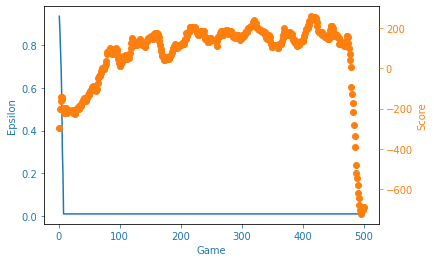

In [8]:
""" Train Agent """

import numpy as np
import gym
import tensorflow as tf
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
'''
In detail:-
0 = all messages are logged (default behavior)
1 = INFO messages are not printed
2 = INFO and WARNING messages are not printed
3 = INFO, WARNING, and ERROR messages are not printed
'''

tf.compat.v1.disable_eager_execution()
env = gym.make('LunarLander-v2')
lr = 0.001
episodes = 500
agent = DQNAgent(gamma=0.99, epsilon=1.0, lr=lr, 
            input_dims=env.observation_space.shape,
            n_actions=env.action_space.n, mem_size=1000000, batch_size=64,
            epsilon_min=0.01)
scores = []
eps_history = []

for i in range(episodes):
    done = False
    score = 0
    observation = env.reset()
    while not done:
        action = agent.choose_action(observation)
        observation_, reward, done, info = env.step(action)
        score += reward
        agent.store_transition(observation, action, reward, observation_, done)
        observation = observation_
        agent.learn()
    eps_history.append(agent.epsilon)
    scores.append(score)

    avg_score = np.mean(scores[-100:])
    print('episode: ', i, 'score %.2f' % score,
            'average_score %.2f' % avg_score,
            'epsilon %.2f' % agent.epsilon)
    
filename = 'learning_curve_lunar_lander_dqn.png'
x = [i+1 for i in range(episodes)]
plotLearning(x, scores, eps_history, filename)

In [ ]:
""" Test trained agent"""

episodes = 50
scores = []
eps_history = []

for i in range(episodes):
    done = False
    score = 0.0
    observation = env.reset()
    agent.epsilon = 0.0
    while not done:
        env.render()
        action = agent.choose_action(observation)
        observation_, reward, done, _ = env.step(action)
        observation = observation_
        score += reward
    eps_history.append(agent.epsilon)
    scores.append(score)

    avg_score = np.mean(scores[-100:])
    print('episode: ', i, 'score %.2f' % score,
            'average_score %.2f' % avg_score,
            'epsilon %.2f' % agent.epsilon)

filename = 'performance_lunar_lander_trained_dqn.png'
x = [i+1 for i in range(episodes)]
plotLearning(x, scores, eps_history, filename)
env.close()

<a name='2.5'></a>
## 2.5 - DQN implementation with Keras-RL

In [ ]:
'''
# create instance of the model
model = build_model(states, actions)

# print model summary
model.summary() 
'''

""" Create DeepQNetwork Class """

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense
from tensorflow import keras

class DeepQNetwork(keras.Model):
    def __init__(self, input_dims, n_actions, fc1_dims, fc2_dims):
        super(DeepQNetwork, self).__init__()
        self.fc1 = Dense(fc1_dims, activation='relu')
        self.fc2 = Dense(fc2_dims, activation='relu')
        self.fc3 = Dense(n_actions, activation=None)    
        
    def call(self, state):
        x = self.fc1(state)
        x = self.fc2(x)
        x = self.fc3(x)
        
        return x

In [ ]:
# packages for tensorflow implementation
import gym
from rl.agents import DQNAgent
from rl.policy import EpsGreedyQPolicy
from rl.memory import SequentialMemory

env = gym.make('LunarLander-v2')

policy = EpsGreedyQPolicy()
model = DeepQNetwork(input_dims=env.observation_space.shape, n_actions=env.action_space.n, fc1_dims=256, fc2_dims=256)
memory = SequentialMemory(limit=50000, window_length=1)
dqn = DQNAgent(model=model, nb_actions=env.action_space.n, memory=memory, policy=policy, nb_steps_warmup=10, target_model_update=1e-2)

In [ ]:
# create instance 
dqn = build_agent(model, actions)
# compile agent
dqn.compile(Adam(learning_rate=1e-3), metrics=["mae"])

In [ ]:
# train model
env = gym.make('LunarLander-v2')
dqn.fit(env, nb_steps=20000, visualize=False, verbose=0)

In [ ]:
scores = dqn.test(env, nb_episodes=10, visualize=False)
print(np.mean(scores.history["episode_reward"]))

In [ ]:
_ = dqn.test(env, nb_episodes=5, visualize=True)

In [ ]:
# save weights
dqn.save_weights("dqn_weights.h5f", overwrite=True)

In [ ]:
# delete model, agent and environment to make sure the weights are deleted and then loaded
del model
del dqn
del env

dqn.test(env, nb_episodes=5, visualize=True)

In [ ]:
# create all pieces again
env = gym.make("CartPole-v1")
states = env.observation_space.shape[0]
actions = env.action_space.n
model = build_model(states, actions)
dqn = build_agent(model, actions)
dqn.compile(Adam(learning_rate=1e-3), metrics=["mae"])

In [ ]:
# load weights to model
dqn.load_weights("dqn_weights.h5f")

In [ ]:
# run test
dqn.test(env, nb_episodes=5, visualize=True)